## Heart Disease Mortality Data Among US Adults (35+) by State/Territory and County ##

### Heart diseases prediction with Machine Learning ###

##### 2013 to 2015, 3-year average. Rates are age-standardized. County rates are spatially smoothed. The data can be viewed by gender and race/ethnicity. Data source: National Vital Statistics System. Additional data, maps, and methodology can be viewed on the Interactive Atlas of Heart Disease and Stroke http://www.cdc.gov/dhdsp/maps/atlas #####

##### Heart disease, alternatively known as cardiovascular disease, encases various conditions that impact the heart and has been the primary basis of death worldwide over the past few decades. It associates many risk factors in heart disease and the need for accurate, reliable, and sensible approaches to make an early diagnosis to achieve prompt management of the disease. Machine Learning is a commonly used technique for processing enormous amounts of data in the healthcare domain. Researchers apply several data mining and machine learning techniques to analyze complex medical data, helping healthcare professionals predict heart disease.
#####

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score;
import joblib


### Importing and understanding our dataset ###

In [1]:
import pandas as pd

url = "https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
print(df.head())
df

   Year LocationAbbr    LocationDesc GeographicLevel DataSource  \
0  2014           AK  Aleutians East          County       NVSS   
1  2014           AK  Aleutians West          County       NVSS   
2  2014           AK       Anchorage          County       NVSS   
3  2014           AK          Bethel          County       NVSS   
4  2014           AK     Bristol Bay          County       NVSS   

                     Class                    Topic  Data_Value  \
0  Cardiovascular Diseases  Heart Disease Mortality       105.3   
1  Cardiovascular Diseases  Heart Disease Mortality       211.9   
2  Cardiovascular Diseases  Heart Disease Mortality       257.9   
3  Cardiovascular Diseases  Heart Disease Mortality       351.6   
4  Cardiovascular Diseases  Heart Disease Mortality         NaN   

          Data_Value_Unit                                    Data_Value_Type  \
0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Avera...   
1  per 100,000 population  Age-adj

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59071,2014,TX,Lubbock County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Asian and Pacific Islander,T2,48303,"(33.613697, -101.820878)"
59072,2014,TX,Mitchell County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Black,T2,48335,"(32.306972, -100.919542)"
59073,2014,IA,Winnebago County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,19189,"(43.375754, -93.73907)"
59074,2014,WV,Lewis County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,54041,"(38.995666, -80.505332)"


### Printing out a few columns ###

In [5]:
df.shape

(59076, 19)

In [6]:
df = pd.read_csv(url)

df.head(5)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [7]:
df.sample(5)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
2327,2014,AR,Woodruff County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Hispanic,T2,5147,"(35.189001, -91.23847)"
49757,2014,WV,Lincoln County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,485.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Male,Race/Ethnicity,Black,T2,54043,"(38.175474, -82.067652)"
50373,2014,WY,Campbell County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Black,T2,56005,"(44.248013, -105.549392)"
35122,2014,OR,Wallowa County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Hispanic,T2,41063,"(45.5779, -117.183234)"
52022,2014,OH,Delaware County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,119.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,39041,"(40.27916, -83.002617)"


### Description ###

In [8]:
df.describe()

,Year,Data_Value,LocationID
count,59076.0,32149.000000,59076.000000
mean,2014.0,349.306775,30946.267215
std,0.0,140.549773,16728.893538
min,2014.0,6.000000,0.000000
25%,2014.0,253.300000,18137.000000
50%,2014.0,340.000000,29208.000000
75%,2014.0,433.800000,46091.000000
max,2014.0,3000.900000,78030.000000


## Initial Data Analysis ##
## Count the instances of disease and no disease. ##

In [9]:
value_counts = df['Data_Value_Type'].value_counts()
print(value_counts)

Data_Value_Type
Age-adjusted, Spatially Smoothed, 3-year Average Rate    58050
Age-adjusted, 3-year Average Rate                         1026
Name: count, dtype: int64


In [10]:
value_counts = df['Data_Value'].value_counts()
print(value_counts)

Data_Value
335.7    21
349.2    21
285.6    20
343.5    19
361.1    19
         ..
906.8     1
842.7     1
883.6     1
933.8     1
42.4      1
Name: count, Length: 6147, dtype: int64


In [11]:
disease = len(df[df['Data_Value'] == 1])
no_disease = len(df[df['Data_Value']== 0])

## Load and Inspect Data ##

In [12]:
print(df.tail())

       Year LocationAbbr      LocationDesc GeographicLevel DataSource  \
59071  2014           TX    Lubbock County          County       NVSS   
59072  2014           TX   Mitchell County          County       NVSS   
59073  2014           IA  Winnebago County          County       NVSS   
59074  2014           WV      Lewis County          County       NVSS   
59075  2014           KS   Republic County          County       NVSS   

                         Class                    Topic  Data_Value  \
59071  Cardiovascular Diseases  Heart Disease Mortality         NaN   
59072  Cardiovascular Diseases  Heart Disease Mortality         NaN   
59073  Cardiovascular Diseases  Heart Disease Mortality         NaN   
59074  Cardiovascular Diseases  Heart Disease Mortality         NaN   
59075  Cardiovascular Diseases  Heart Disease Mortality         NaN   

              Data_Value_Unit  \
59071  per 100,000 population   
59072  per 100,000 population   
59073  per 100,000 population   
59

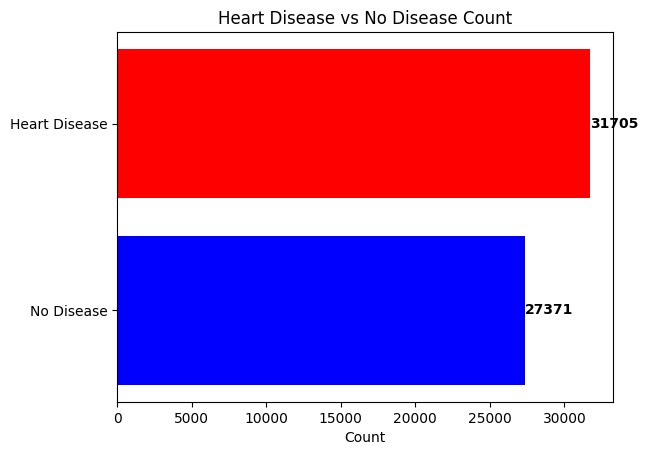

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Set the threshold for classifying heart disease
threshold = 100  

if 'Data_Value' in data.columns:
    data['target'] = (data['Data_Value'] >= threshold).astype(int)
else:
    print("Column 'Data_Value' not found in the dataset. Please check the column name.")
    # Optionally, you can list all columns to debug
    print("Available columns:", data.columns)

# Calculate the number of cases and non-cases
disease = len(data[data['target'] == 1])
no_disease = len(data[data['target'] == 0])

# Plotting
plt.rcdefaults()
fig, ax = plt.subplots()
y_labels = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y_labels))
x_counts = (disease, no_disease)

# Create horizontal bar plot
ax.barh(y_pos, x_counts, align='center', color=['red', 'blue'])
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Heart Disease vs No Disease Count')

# Add counts as text on the bars
for i, v in enumerate(x_counts):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='bold')

# Show the plot
plt.show()



### Percentage of target ###

In [3]:
# Display the column names of the DataFrame
print(df.columns)

print(df['Data_Value'].describe())


Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Location 1'],
      dtype='object')
count    32149.000000
mean       349.306775
std        140.549773
min          6.000000
25%        253.300000
50%        340.000000
75%        433.800000
max       3000.900000
Name: Data_Value, dtype: float64


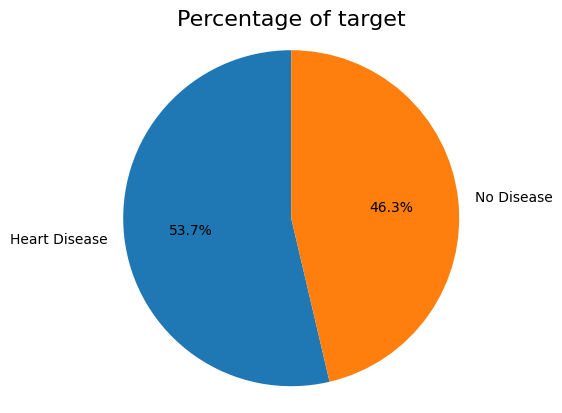

In [15]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  
plt.title('Percentage of target', size=16)
plt.show()

### Analysing the 'target' variable ###

In [4]:
df["Data_Value"].describe()

count    32149.000000
mean       349.306775
std        140.549773
min          6.000000
25%        253.300000
50%        340.000000
75%        433.800000
max       3000.900000
Name: Data_Value, dtype: float64

In [5]:
df['Data_Value'].unique()


array([105.3, 211.9, 257.9, ..., 121. ,  45.2,  42.4])

### Clearly, this is a classification problem, with the target variable having values '0' and '1'###
#### Checking correlation between columns ####

In [6]:
# Calculate correlations and sort them
correlations = df.corr(numeric_only=True)["Data_Value"].abs().sort_values(ascending=False)
print(correlations)

Data_Value    1.000000
LocationID    0.015145
Year               NaN
Name: Data_Value, dtype: float64


In [19]:
#This shows that most columns are moderately correlated with target

### Data Cleaning and Preprocessing ###

In [7]:
# Select relevant columns and handle missing values
data_cleaned = df[['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 
                   'DataSource', 'Class', 'Topic', 'Data_Value']]

# Drop rows with missing 'Data_Value' (target variable)
data_cleaned = data_cleaned.dropna(subset=['Data_Value'])

# Fill missing values for other columns with the mode (most frequent value)
for column in ['GeographicLevel', 'DataSource', 'Class', 'Topic']:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

# Encode categorical columns
label_encoders = {}
for column in ['LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Topic']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Display the cleaned data
print(data_cleaned.head())


NameError: name 'LabelEncoder' is not defined

###  Missing Values ###

In [21]:
df.isna().sum() 

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26927
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32149
Data_Value_Footnote           32149
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Location 1                       18
dtype: int64

In [8]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [9]:
qualitative

['Year',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID']

In [10]:
quantitative

['LocationAbbr', 'LocationDesc', 'Data_Value', 'LocationID', 'Location 1']

### Top correlated features of dataset ###

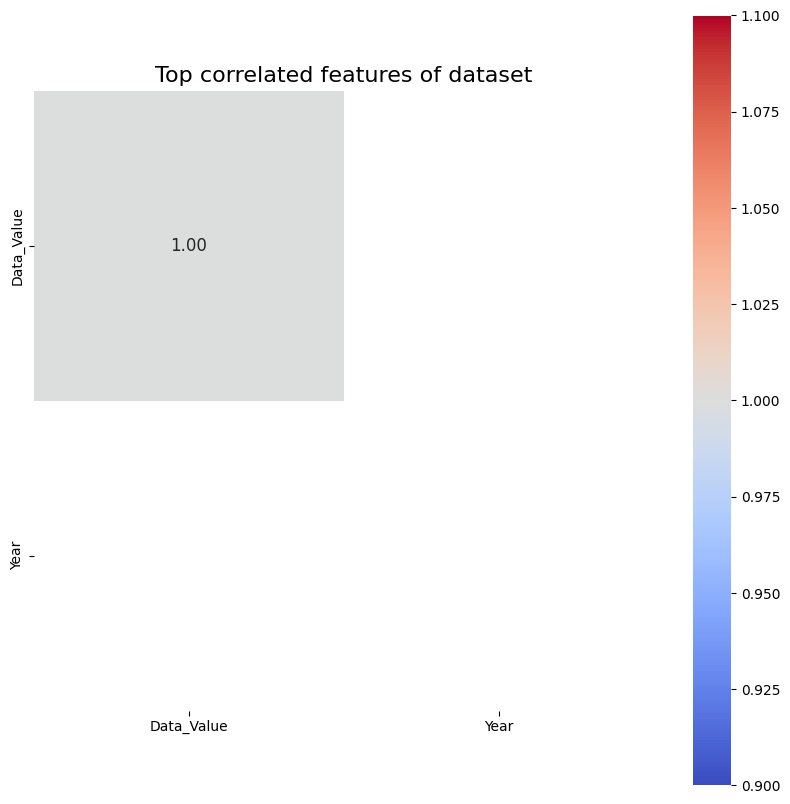

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = data_cleaned.corr(numeric_only=True)

# Get the top 15 features most correlated with 'Data_Value'
top = 15
top15 = corr.nlargest(top, 'Data_Value')['Data_Value'].index

# Create a correlation matrix for the top 15 features
corr_top15 = data_cleaned[top15].corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Top correlated features of dataset', size=16)
plt.show()


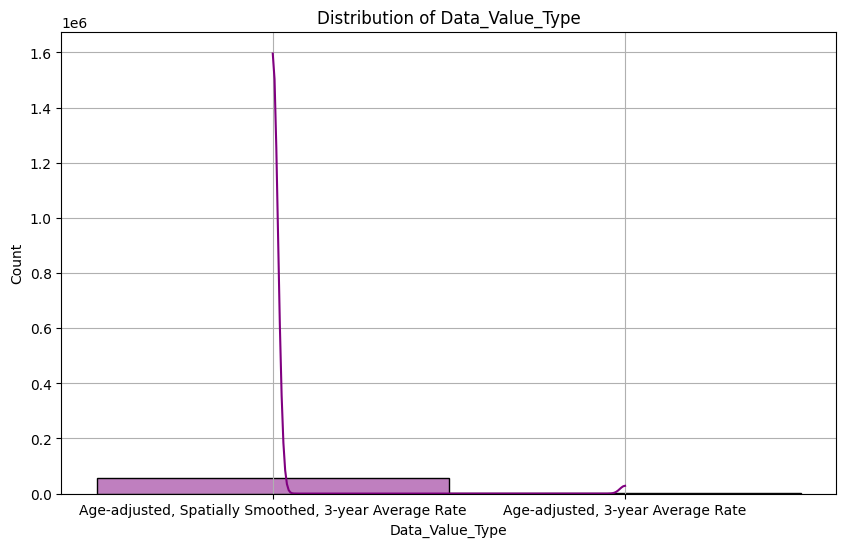

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Check if 'Data_Value_Type' column exists
if 'Data_Value_Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Data_Value_Type'], kde=True, bins=30, color='purple')  
    plt.title('Distribution of Data_Value_Type')
    plt.xlabel('Data_Value_Type')
    plt.ylabel('Count')  # Adjust ylabel based on your actual data interpretation
    plt.grid(True)
    plt.show()
else:
    print("Column 'Data_Value_Type' not found in the dataset. Available columns are:", df.columns)



#### Seaborn visualizing with creating plots that pairwise relationships in a dataset. ####

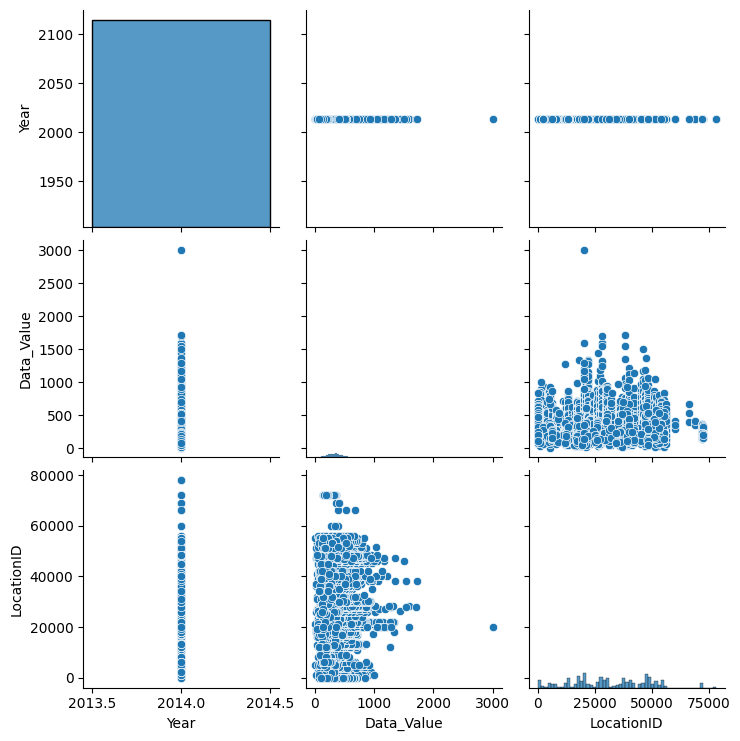

In [13]:
sns.pairplot(df)

## RandomForestRegressor ##

### Prediction of new data ###

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Define features and target variable
features = data_cleaned[['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Topic']]
data_cleaned['Data_Value_Category'] = pd.cut(data_cleaned['Data_Value'], bins=3, labels=['low', 'medium', 'high'])
target = data_cleaned['Data_Value_Category']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target variable
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create the model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, Y_train_encoded)

# Save the trained model for future use
joblib.dump(rf_classifier, 'heart_disease_regressor_model.pkl')

# Optionally, you can evaluate the model on the test set
accuracy = rf_classifier.score(X_test_scaled, Y_test_encoded)
print(f'Accuracy on test set: {accuracy:.2f}')

ValueError: could not convert string to float: 'MN'

In [15]:
import pandas as pd
import joblib
import os

model_file = 'heart_disease_regressor_model.pkl'
label_encoders_file = 'label_encoders.pkl'
scaler_file = 'scaler.pkl'

# Check current directory contents
print(os.listdir())

# Check if the model file exists
if not os.path.exists(model_file):
    print(f"Error: {model_file} not found. Please check the file path.")
else:
    # Load the saved model
    loaded_model = joblib.load(model_file)
    
    # Load label encoders and scaler
    if os.path.exists(label_encoders_file) and os.path.exists(scaler_file):
        label_encoders = joblib.load(label_encoders_file)
        scaler = joblib.load(scaler_file)
    else:
        print("Error: label_encoders.pkl or scaler.pkl not found. Please check the file path.")
        exit()
    
    try:
        # Prepare new data
        new_data = pd.DataFrame({
            'Year': [2022],
            'LocationAbbr': [label_encoders['LocationAbbr'].transform(['AK'])[0]], 
            'LocationDesc': [label_encoders['LocationDesc'].transform(['Anchorage'])[0]], 
            'GeographicLevel': [label_encoders['GeographicLevel'].transform(['County'])[0]],  
            'DataSource': [label_encoders['DataSource'].transform(['NVSS'])[0]],  
            'Class': [label_encoders['Class'].transform(['Cardiovascular Diseases'])[0]],  
            'Topic': [label_encoders['Topic'].transform(['Heart Disease Mortality'])[0]] 
        })

        # Scale the new data
        new_data_scaled = scaler.transform(new_data)

        # Predict the heart disease mortality rate
        prediction = loaded_model.predict(new_data_scaled)

        print(f'Predicted Heart Disease Mortality Rate: {prediction[0]}')
    
    except Exception as e:
        print(f"Error during prediction: {e}")



['.ipynb_checkpoints', 'app (1).py', 'Fwd_ Yeni Dosya- heart_disease_regressor_model.zip', 'heart_disease.csv', 'heart_disease_regressor_model.ipynb', 'heart_disease_regressor_model.pkl', 'public_index.html']
Error: label_encoders.pkl or scaler.pkl not found. Please check the file path.
Error during prediction: 'LocationAbbr'


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the model
model_file = 'heart_disease_regressor_model.pkl'
loaded_model = joblib.load(model_file)

url = "https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Assuming 'target' is the column to be predicted (adjust as needed)
features = data.drop('target', axis=1)
target = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


NameError: name 'data' is not defined

## The accuracy score achieved using Random Forest ##

In [1]:
from sklearn.metrics import accuracy_score

# Predict on the test set
Y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy score
score_rf = round(accuracy_score(Y_pred_rf, Y_test_encoded) * 100, 2)

# Print the accuracy score
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")


NameError: name 'rf_classifier' is not defined

##  Output final score ##

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores for algorithms (example values)
algorithms = ["Random Forest"]
scores = [83.5]  # Example accuracy score for Random Forest

# Create a DataFrame from algorithms and scores
data = pd.DataFrame({'Algorithms': algorithms, 'Accuracy': scores})

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the barplot using Seaborn
sns.barplot(x='Algorithms', y='Accuracy', data=data)

# Set labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Algorithms")

# Show the plot
plt.show()


## Backend Development ##
### Model Development ###
#### Train your machine learning model using the provided dataset.
#### Save the trained model using jobli ####

In [ ]:
# DUZEL BURAYI 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
url = "https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Data Cleaning and Preprocessing
data_cleaned = df[['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 
                   'DataSource', 'Class', 'Topic', 'Data_Value']]
data_cleaned = data_cleaned.dropna(subset=['Data_Value'])

label_encoders = {}
for column in ['LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Topic']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

features = data_cleaned[['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Topic']]
data_cleaned['Data_Value_Category'] = pd.cut(data_cleaned['Data_Value'], bins=3, labels=['low', 'medium', 'high'])
target = data_cleaned['Data_Value_Category']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, Y_train_encoded)

joblib.dump(rf_classifier, 'heart_disease_regressor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(label_encoder, 'target_label_encoder.pkl')
